# 3 Preprocessing and Training Data <a id="preprocessing_training"></a>

## 3.1 Contents <a id="contents"></a>

- [3 Preprocessing and Training Data](#preprocessing_training)
  - [3.1 Contents](#contents)
  - [3.2 Introduction](#introduction)
      - [3.2.1 Objective](#objective)
  - [3.3 Imports](#imports)
  - [3.4 Load the Data](#dataload)
  - [3.5 Explore the Data](#explore_data)
  - [3.6 Imputations](#imputations)
    - [3.6.1 Correlations with Imputed Median Income](#correlations)
  - [3.7 Train/Test Split](#train_test_split)
  - [3.8 Initial Average Model](#initial)
  - [3.9 Metrics](#metrics)
      - [3.9.1 Scaling the Data](#scaling)
  - [3.10 Dimensionality Reduction](#dimensionality_reduction)
  - [3.11 Model 1 - Linear Regression](#model1)
  - [3.12 Model 2 - Random Forest Regressor](#model2)
  - [3.13 Best Model](#bestmodel)

## 3.2 Introduction <a id="introduction"></a>

We've completed our data wrangling and exploration phases, but now we need to process and gather our training data. Our goal is to find the optimal model that will most accurately predict student test scores (our target feature). 

### 3.2.1 Objective <a id="objective"></a>

We want to ensure our data is preprocessed so we may implement machine learning algorithms to best predict student test scores. We'll start by considering how useful the mean value is as a predictor. We will build up the process of efficiently and robustly creating and assessing models against it. We'll also do some data imputation for our missing median income values, scale our data, and split our dataset into training and testing subsets. This step also typically includes encoding categorical variables into numerical representation, but this is unnecessary for this project since we're not including categorical variables into our model. 

## 3.3 Imports <a id="imports"></a>

In [406]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as tick
import sklearn.model_selection

from sklearn import neighbors, datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

## 3.4 Load the Data <a id="dataload"></a>

In [407]:
# Load the dataset
data_path = '/Users/joshuabe/Downloads/Capstone 2 - Student Success Prediction/final_studentsuccess_df.xlsx'
df = pd.read_excel(data_path, sheet_name='Sheet1')

# Display the first few rows of the dataset to understand its structure
df.head()

,district_id,district_name,Year,income_by_district,above_crit_rate,estimated_children_in_poverty_5_17,estimated_population_5_17,above_tsi_both_rate,property_value_per_attended_student,property_value_per_enrolled_student,...,state_funding_per_attended_student,federal_funding_per_attended_student,total_funding_per_attended_student,local_funding_per_enrolled_student,state_funding_per_enrolled_student,federal_funding_per_enrolled_student,total_funding_per_enrolled_student,absenteeism_rate,child_poverty_rate,teacher_quality_composite
0,1902,Cayuga ISD,2022,NaN,10.3,79.0,467.0,27.6,563369.202281,533212.264808,...,18906.503900,5042.135276,39017.819737,14262.533101,17894.445993,4772.231707,36929.210801,5.352962,16.916488,0.931091
1,1902,Cayuga ISD,2019,NaN,20.8,94.0,539.0,62.5,521309.154316,497749.492908,...,13088.692710,3605.430530,30544.878378,13224.794326,12497.171986,3442.489362,29164.455674,4.519326,17.439703,4.201237
2,1902,Cayuga ISD,2020,NaN,NaN,122.0,535.0,30.8,589729.329704,553881.833034,...,18073.750530,3018.646945,34858.764924,12929.560144,16975.113106,2835.154399,32739.827648,6.078636,22.803738,4.406794
3,1902,Cayuga ISD,2018,NaN,20.0,90.0,561.0,53.3,466645.933809,444918.899130,...,12207.621646,3050.376851,27243.573842,11427.526957,11639.234783,2908.351304,25975.113043,4.656000,16.042781,-0.404618
4,1902,Cayuga ISD,2021,NaN,19.0,74.0,466.0,19.0,572530.399938,551480.543925,...,19706.364854,3815.242660,36746.979605,12739.123364,18981.833645,3674.970093,35395.927103,3.676636,15.879828,1.797252


## 3.5 Explore the Data <a id="explore_data"></a>

In [408]:
print(df.shape)
print(df.describe())
print(df.dtypes)

(6394, 38)
         district_id         Year  income_by_district  above_crit_rate  \
count    6394.000000  6394.000000          969.000000      4770.000000   
mean   124726.359712  2020.449797        62824.375645        19.615828   
std     73438.666993     1.690340        21451.580283        14.215527   
min      1902.000000  2018.000000        20374.000000         0.300000   
25%     61903.500000  2019.000000        49076.000000         9.500000   
50%    114904.000000  2020.000000        59947.000000        16.500000   
75%    185902.750000  2022.000000        71250.000000        25.900000   
max    254902.000000  2023.000000       243911.000000       100.000000   

       estimated_children_in_poverty_5_17  estimated_population_5_17  \
count                         4821.000000                4821.000000   
mean                          1035.928438                5659.601328   
std                           3569.916132               16137.260473   
min                              1

## 3.6 Imputations <a id="imputations"></a>

We'll need to impute the missing values for median income for the years 2018-2022 (our target years). We only have median income data per school district for 2023, but we can take the state-wide median income changes to estimate the district-level incomes for the missing years. *This method assumes that the economic trends affecting median income are relatively consistent across the state and that the districts follow the state's overall economic pattern.*  

In [409]:
# Median incomes for entire state for 2018-2023:
texas_median_income = {
    2023: 72284,
    2022: 74640,
    2021: 67404,
    2020: 68404,
    2019: 67444,
    2018: 59785
}

# Now we can add the Texas Median Income to your DataFrame using the map function:
df['texas_median_income'] = df['Year'].map(texas_median_income)

In [410]:
# Calculate the state's yearly percentage change
df['texas_percentage_change'] = df['texas_median_income'].pct_change()

# Now we calculate the percentage change in median income year over year in Texas
# We will do this by converting the dictionary to a series and using the `pct_change` method
texas_income_series = pd.Series(texas_median_income).sort_index()  # Ensure it is sorted by year
texas_income_pct_change = texas_income_series.pct_change().dropna()

# For imputation: First, we need to find the median income for each district for 2023 to use as a reference
# We then apply the year-over-year percentage changes to back-calculate the median income for previous years

# Finding the last non-null income value for each district, assuming it corresponds to the year 2023
district_income_2023 = df[df['Year'] == 2023].groupby('district_id')['income_by_district'].first()

# Function to calculate the income for previous years based on the 2023 reference and the state's income change
def calculate_previous_years_income(row):
    if pd.notnull(row['income_by_district']):
        # If the value is already present, return it
        return row['income_by_district']

    # Calculate the median income for the district for previous years
    income_2023 = district_income_2023.get(row['district_id'])
    if pd.notnull(income_2023):
        # Calculate the year difference from 2023
        year_diff = 2023 - row['Year']
        # Apply the percentage changes consecutively to get the income for the given year
        income = income_2023
        for i in range(year_diff):
            # Apply the percentage change for the year before (e.g., 2022 for 2023 reference)
            pct_change = texas_income_pct_change.get(2023 - i - 1)
            if pct_change is not None:  # Check if pct_change is None and skip if it is
                income /= (1 + pct_change)
        return income

    # If there's no income for 2023, we cannot impute for this district
    return None

# Apply the function to the 'income_by_district' column
df['median_income'] = df.apply(calculate_previous_years_income, axis=1)

# Display the changes
df[['district_id', 'Year', 'income_by_district', 'median_income', 'texas_median_income']].head(10)

,district_id,Year,income_by_district,median_income,texas_median_income
0,1902,2022,NaN,55531.540354,74640
1,1902,2019,NaN,49254.541868,67444
2,1902,2020,NaN,55564.494802,68404
3,1902,2018,NaN,49254.541868,59785
4,1902,2021,NaN,56355.401554,67404
5,1902,2023,61493.0,61493.000000,72284
6,1903,2019,NaN,52266.219252,67444
7,1903,2020,NaN,58961.995338,68404
8,1903,2023,65253.0,65253.000000,72284
9,1903,2022,NaN,58927.025884,74640


In [411]:
df = df[df['Year'] != 2023]

In [412]:
# Now let's check if there are any missing values left in the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
missing_values_after_imputation = df[numerical_columns].isnull().sum()
missing_values_after_imputation

district_id                                0
Year                                       0
income_by_district                      5425
above_crit_rate                          655
estimated_children_in_poverty_5_17       604
estimated_population_5_17                604
above_tsi_both_rate                      380
property_value_per_attended_student      554
property_value_per_enrolled_student      554
county                                    60
dist_allr_grad                            60
dist_allr_drop                            60
part_rate                                 80
avg_base_pay                              16
fte_count                                 16
fall_enrollment                            0
ADA                                        0
teacher_avg_yrs_experience                 7
student_teacher_ratio                      7
teacher_ms_degree_percent                  7
teacher_no_degree_percent                  7
teacher_phd_degree_percent                 7
teacher_av

### 3.6.1 Correlations with Imputed Median Income <a id="correlations"></a>

Let's check out the correlations of each feature to test scores again, this time with the imputed incomes per district, to see if median incomes correlate more strongly to test scores than child poverty rate. 

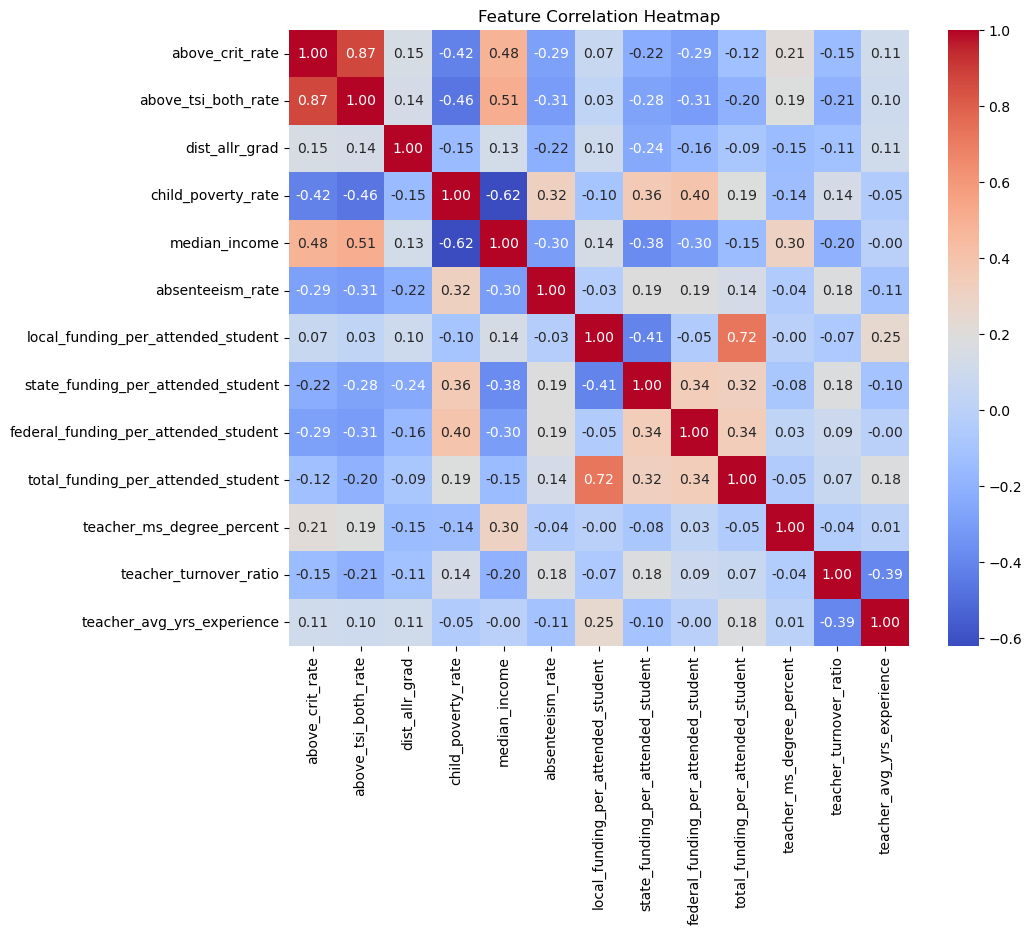

In [413]:
# Generating a correlation matrix for selected variables including the target variable, adding in imputed incomes
correlation_vars = ['above_crit_rate', 'above_tsi_both_rate', 'dist_allr_grad', 'child_poverty_rate', 
                    'median_income', 
                    'absenteeism_rate', 'local_funding_per_attended_student','state_funding_per_attended_student', 
                    'federal_funding_per_attended_student', 'total_funding_per_attended_student', 
                    'teacher_ms_degree_percent', 'teacher_turnover_ratio', 'teacher_avg_yrs_experience'
                    ]
correlation_matrix = df[correlation_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

**Our imputed median income value has the highest absolute correlation to our test scores target variable of ANY other feature: a moderately strong correlation of 0.51.** This is slightly higher than child poverty rate correlation, which is -0.46. Median income has multicollinearity with child poverty rate (they are strongly negatively correlated to each other), so we'll see which feature gives us the better model in the modeling stage. 

## 3.7 Train/Test Split <a id="train_test_split"></a>

We'll split our dataset into training and testing subsets, dropping the columns that we don't need. 

In [414]:
# Dropping unnecessary columns
df = df.drop(['above_crit_rate', 'Year', 'income_by_district', 'county', 'county_name', 'region_name', 
             'district_name'], axis=1)

# Separate the features and the target variable
X = df.drop('above_tsi_both_rate', axis=1)  # Features
y = df['above_tsi_both_rate']  # Target

In [415]:
# Perform train/test split w/ typical split of 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

In [416]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4340, 33) (1085, 33)
(4340,) (1085,)


In [417]:
X_train.dtypes

district_id                               int64
estimated_children_in_poverty_5_17      float64
estimated_population_5_17               float64
property_value_per_attended_student     float64
property_value_per_enrolled_student     float64
dist_allr_grad                          float64
dist_allr_drop                          float64
part_rate                               float64
avg_base_pay                            float64
fte_count                               float64
fall_enrollment                         float64
ADA                                     float64
teacher_avg_yrs_experience              float64
student_teacher_ratio                   float64
teacher_ms_degree_percent               float64
teacher_no_degree_percent               float64
teacher_phd_degree_percent              float64
teacher_avg_tenure_yrs                  float64
teacher_turnover_ratio                  float64
local_funding_per_attended_student      float64
state_funding_per_attended_student      

In [418]:
X_test.dtypes

district_id                               int64
estimated_children_in_poverty_5_17      float64
estimated_population_5_17               float64
property_value_per_attended_student     float64
property_value_per_enrolled_student     float64
dist_allr_grad                          float64
dist_allr_drop                          float64
part_rate                               float64
avg_base_pay                            float64
fte_count                               float64
fall_enrollment                         float64
ADA                                     float64
teacher_avg_yrs_experience              float64
student_teacher_ratio                   float64
teacher_ms_degree_percent               float64
teacher_no_degree_percent               float64
teacher_phd_degree_percent              float64
teacher_avg_tenure_yrs                  float64
teacher_turnover_ratio                  float64
local_funding_per_attended_student      float64
state_funding_per_attended_student      

## 3.8 Initial Average Model <a id="initial"></a>

A good place to start is to see how good the mean is as a predictor. In other words, what if our best guess is simply the average test score for a district? To predict the target variable's value using the mean, we'll use a Dummy Regressor as a simple baseline model, which will be a reference point for comparing the performance of more complex models. 

In [419]:
train_mean = y_train.mean()
train_mean

31.089738529847065

In [420]:
from sklearn.dummy import DummyRegressor

# Drop samples with NaN values
# This will remove the entire row in X_train and y_train where y_train is NaN
X_train_clean, y_train_clean = X_train[~y_train.isna()], y_train[~y_train.isna()]

dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train_clean, y_train_clean)
print(dummy_reg.constant_)

[[31.08973853]]


## 3.9 Metrics <a id="metrics"></a>

**R-squared and MAE (mean absolute error)** will be our two primary metrics used to evaluate performance. 

In [421]:
missing = X_test.isnull().sum()
missing

district_id                               0
estimated_children_in_poverty_5_17      110
estimated_population_5_17               110
property_value_per_attended_student     105
property_value_per_enrolled_student     105
dist_allr_grad                           11
dist_allr_drop                           11
part_rate                                18
avg_base_pay                              2
fte_count                                 2
fall_enrollment                           0
ADA                                       0
teacher_avg_yrs_experience                0
student_teacher_ratio                     0
teacher_ms_degree_percent                 0
teacher_no_degree_percent                 0
teacher_phd_degree_percent                0
teacher_avg_tenure_yrs                    0
teacher_turnover_ratio                    3
local_funding_per_attended_student        0
state_funding_per_attended_student        0
federal_funding_per_attended_student      0
total_funding_per_attended_stude

There are still some missing values among a few features, so we'll want to address these clearly and cohesively. 

In [422]:
# Drop NaN values from the test set
X_test_clean, y_test_clean = X_test[~y_test.isna()], y_test[~y_test.isna()]

In [423]:
# Predict using the dummy regressor on the cleaned test set
y_pred_dummy = dummy_reg.predict(X_test_clean)

In [424]:
# Calculate the R2 score and Mean Absolute Error (MAE)
r2_dummy_train = r2_score(y_train_clean, dummy_reg.predict(X_train_clean))
r2_dummy_test = r2_score(y_test_clean, y_pred_dummy)
mae_dummy_train = mean_absolute_error(y_train_clean, dummy_reg.predict(X_train_clean))
mae_dummy_test = mean_absolute_error(y_test_clean, y_pred_dummy)

In [425]:
# Shapes and metrics
test_clean_shapes = (X_train_clean.shape, X_test_clean.shape, y_train_clean.shape, y_test_clean.shape, y_pred_dummy.shape)
test_clean_metrics = (r2_dummy_train, r2_dummy_test, mae_dummy_train, mae_dummy_test)

test_clean_shapes, test_clean_metrics

(((4054, 33), (991, 33), (4054,), (991,), (991,)),
 (0.0, -0.0033411625922057375, 14.117974755696956, 13.528165577021012))

The training set and the test set sizes both have consistent numbers of samples (4,054 samples of features and target for the training set, 991 samples of features and target for the test set). 

In [426]:
print("R2 of Y_train mean prediction's:", r2_dummy_train)
print("R2 of Y_test mean prediction's:", r2_dummy_test)
print("MAE of Y_train mean prediction's:", mae_dummy_train)
print("MAE of Y_test mean prediction's:", mae_dummy_test)

R2 of Y_train mean prediction's: 0.0
R2 of Y_test mean prediction's: -0.0033411625922057375
MAE of Y_train mean prediction's: 14.117974755696956
MAE of Y_test mean prediction's: 13.528165577021012


- R2 of 0 for the training set is expected, since the dummy regressor only predicts the mean. 
- R2 of -0.00334 for the test set: negative R2 indicates that the model performs worse than a horizontal line fitted to the test data. 

These metrics confirm that the dummy regressor, as expected, does not effectively model the data but provides a useful baseline. 

### 3.9.1 Scaling the Data <a id="scaling"></a>

In [427]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected features
X_train_scaled = scaler.fit_transform(X_train_clean.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test_clean.select_dtypes(include=['float64', 'int64']))

We've successfully scaled our features. The data is now standardized, with mean 0 and standard deviation 1 for each feature, which is critical for ML algorithms to perform optimally. 

## 3.10 Dimensionality Reduction <a id="dimensionality_reduction"></a>

We'll use PCA as a method for dimensionality reduction. However, since PCA requires numerical data and our dataset contains categorical data, we would typically convert these categorical variables into numerical ones using encoding techniques like One-Hot Encoding before applying PCA. For this example, let's do PCA on the numerical features only.

In [428]:
# Initialize PCA and specify to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fill NaN values with the mean of each column for PCA compatibility
X_train_filled = np.nan_to_num(X_train_scaled, nan=np.nanmean(X_train_scaled, axis=0))
X_test_filled = np.nan_to_num(X_test_scaled, nan=np.nanmean(X_test_scaled, axis=0))

# Fit and transform the training data, and transform the testing data
X_train_pca = pca.fit_transform(X_train_filled)
X_test_pca = pca.transform(X_test_filled)

# Output the results
n_components_pca = pca.n_components_
print("PCA Components:", n_components_pca)
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

PCA Components: 18
X_train_pca shape: (4054, 18)
X_test_pca shape: (991, 18)


## 3.11 Model 1 - Linear Regression <a id="model1"></a>

In [429]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Step 3.11: Model 1 - Linear Regression
lin_reg = LinearRegression()  # Initialize the model
lin_reg.fit(X_train_pca, y_train_clean) # Train the model
y_pred_lin_reg = lin_reg.predict(X_test_pca) # Make predictions

In [430]:
# Metrics for Linear Regression
mae_lin_reg = mean_absolute_error(y_test_clean, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test_clean, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test_clean, y_pred_lin_reg)

## 3.12 Model 2 - Random Forest Regressor <a id="model2"></a>

In [431]:
# Step 3.12: Model 2 - Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42) # Initialize the model
rf_reg.fit(X_train_pca, y_train_clean) # Train the model
y_pred_rf_reg = rf_reg.predict(X_test_pca) # Make predictions

In [432]:
# Metrics for Random Forest Regressor
mae_rf_reg = mean_absolute_error(y_test_clean, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test_clean, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test_clean, y_pred_rf_reg)

## 3.13 Best Model <a id="bestmodel"></a>

In [433]:
# Preparing the performance data for comparison
model_performance = {
    'Linear Regression': {
        'MAE': mae_lin_reg,
        'MSE': mse_lin_reg,
        'R2': r2_lin_reg
    },
    'Random Forest': {
        'MAE': mae_rf_reg,
        'MSE': mse_rf_reg,
        'R2': r2_rf_reg
    }
}

model_performance

{'Linear Regression': {'MAE': 10.26900161068972,
  'MSE': 169.06913532281584,
  'R2': 0.3800017816495864},
 'Random Forest': {'MAE': 9.326719475277496,
  'MSE': 140.67145492532796,
  'R2': 0.4841397203579708}}

The **Random Forest Regressor performs better on all metrics compared to the Linear Regression model**. It has a lower MAE and MSE, indicating smaller errors on average and less error variance. Additionally, the R2 value is higher, it does a better job at explaining the variations in the target variable (test scores) based on the predictors used. 

Therefore, the **Random Forest is the preferable model** based on the metrics. 